In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
import warnings

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Set to retina version
pd.set_option('display.max_columns', None) # Set max columns output
warnings.filterwarnings('ignore')

In [78]:
#IMPORT CSV FILE
df=pd.read_csv('employee_attrition_dataset.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


# dropping features with very low variance and with similar values

In [23]:
df = df.drop(['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis=1)

In [79]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
df.Age.max()

60

In [13]:
df.Age.min()

18

In [14]:
df.Age.mode()

0    35
Name: Age, dtype: int64

In [15]:
df.Age.median()

36.0

In [16]:
df.Age.mean()

36.923809523809524

In [53]:
df.var()

Age                         8.345505e+01
DailyRate                   1.628196e+05
DistanceFromHome            6.572125e+01
Education                   1.048914e+00
EmployeeCount               1.233434e-32
EmployeeNumber              3.624333e+05
EnvironmentSatisfaction     1.194829e+00
HourlyRate                  4.132856e+02
JobInvolvement              5.063193e-01
JobLevel                    1.225316e+00
JobSatisfaction             1.216270e+00
MonthlyIncome               2.216486e+07
MonthlyRate                 5.066288e+07
NumCompaniesWorked          6.240049e+00
PercentSalaryHike           1.339514e+01
PerformanceRating           1.301936e-01
RelationshipSatisfaction    1.169013e+00
StandardHours               0.000000e+00
StockOptionLevel            7.260346e-01
TotalWorkingYears           6.054056e+01
TrainingTimesLastYear       1.662219e+00
WorkLifeBalance             4.991081e-01
YearsAtCompany              3.753431e+01
YearsInCurrentRole          1.312712e+01
YearsSinceLastPr

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

# column headings

In [57]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [59]:
#data frmae size
df.shape

(1470, 35)

In [54]:
#sorting data by specific column
df.sort_values(by="Age")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1311,18,No,Non-Travel,1431,Research & Development,14,3,Medical,1,1839,2,Female,33,3,1,Research Scientist,3,Single,1514,8018,1,Y,No,16,3,3,80,0,0,4,1,0,0,0,0
457,18,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0
972,18,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368,4,Female,97,3,1,Laboratory Technician,4,Single,1611,19305,1,Y,No,15,3,3,80,0,0,5,4,0,0,0,0
301,18,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0
296,18,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,60,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,1,Male,84,3,2,Sales Executive,1,Single,5405,11924,8,Y,No,14,3,4,80,0,10,1,3,2,2,2,2
427,60,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,3,Female,80,2,3,Sales Executive,1,Married,10266,2845,4,Y,No,19,3,4,80,0,22,5,4,18,13,13,11
411,60,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,1,Female,41,3,5,Manager,1,Married,19566,3854,5,Y,No,11,3,4,80,0,33,5,1,29,8,11,10
879,60,No,Travel_Rarely,696,Sales,7,4,Marketing,1,1233,2,Male,52,4,2,Sales Executive,4,Divorced,5220,10893,0,Y,Yes,18,3,2,80,1,12,3,3,11,7,1,9


In [106]:
data=df.head(2)
data

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1102,1,1,2,1,2,0,94,3,2,1,4,0,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
0,1,279,0,8,1,1,3,1,61,2,2,0,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7


In [107]:
data=df.tail(2)
data

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1023,1,2,3,2,4,1,63,2,2,1,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8
0,0,628,0,8,3,2,2,1,82,4,2,2,3,1,4404,10228,2,0,12,3,1,0,6,3,4,4,3,1,2


In [59]:
#extract specific column
df.Age

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64

In [97]:
#missing values
df.isnull().sum()

BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [98]:
#checking for dupliacates in the dataset
print(df.duplicated().value_counts())
df.drop_duplicates(inplace=True)
print(len(df))

False    1470
dtype: int64
1470


In [99]:
print(df.duplicated().value_counts())

False    1470
dtype: int64


In [149]:
df.Attrition

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [151]:
# Explore the distribution of Attrition
data=df['Attrition'].value_counts()
data

No     1233
Yes     237
Name: Attrition, dtype: int64

In [152]:
# Explore the distribution of EducationField
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [28]:
df=df.set_index('Attrition')
display(df)
df.info()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
No,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
No,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3


<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, Yes to No
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus             147

# Visualize using Age column

In [60]:
df[['Department', 'Age']]

,Department,Age
0,Sales,41
1,Research & Development,49
2,Research & Development,37
3,Research & Development,33
4,Research & Development,27
...,...,...
1465,Research & Development,36
1466,Research & Development,39
1467,Research & Development,27
1468,Sales,49


In [61]:
df['DailyRate'].cumsum()

0          1102
1          1381
2          2754
3          4146
4          4737
         ...   
1465    1177235
1466    1177848
1467    1178003
1468    1179026
1469    1179654
Name: DailyRate, Length: 1470, dtype: int64

# CHARTS

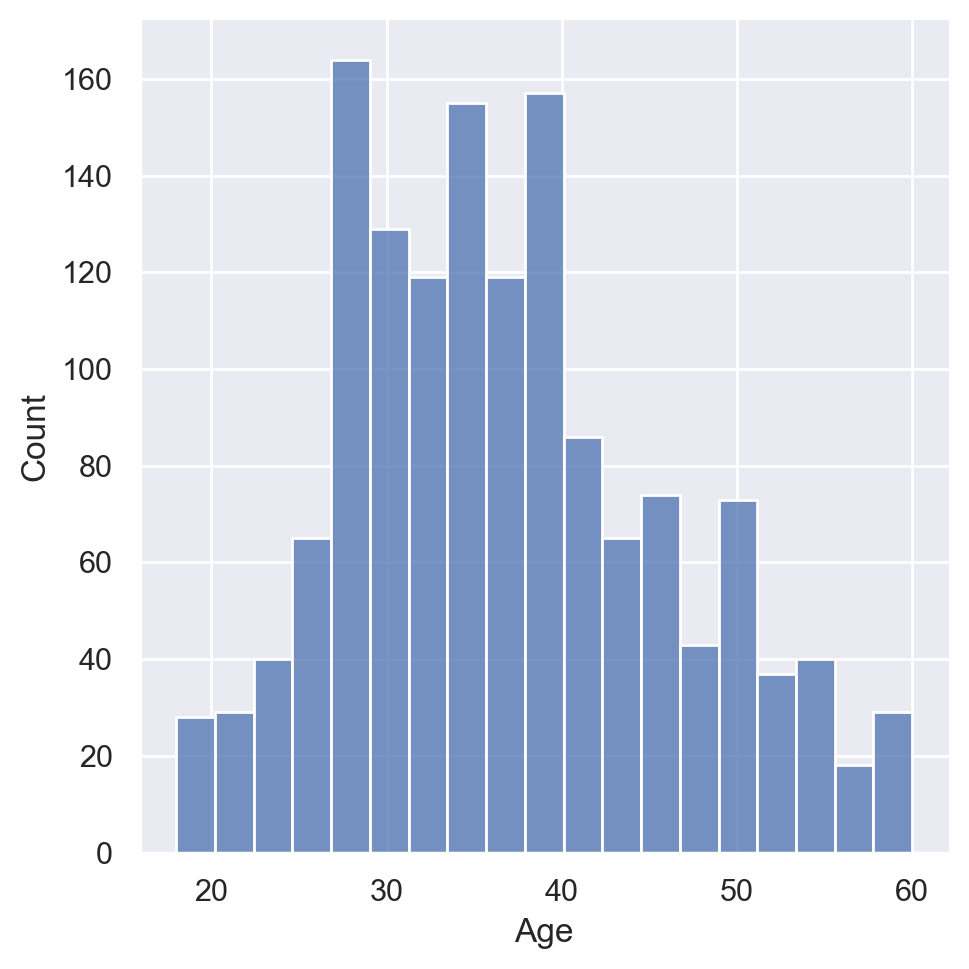

In [62]:
sns.displot(df['Age'])

<Axes: ylabel='Age'>

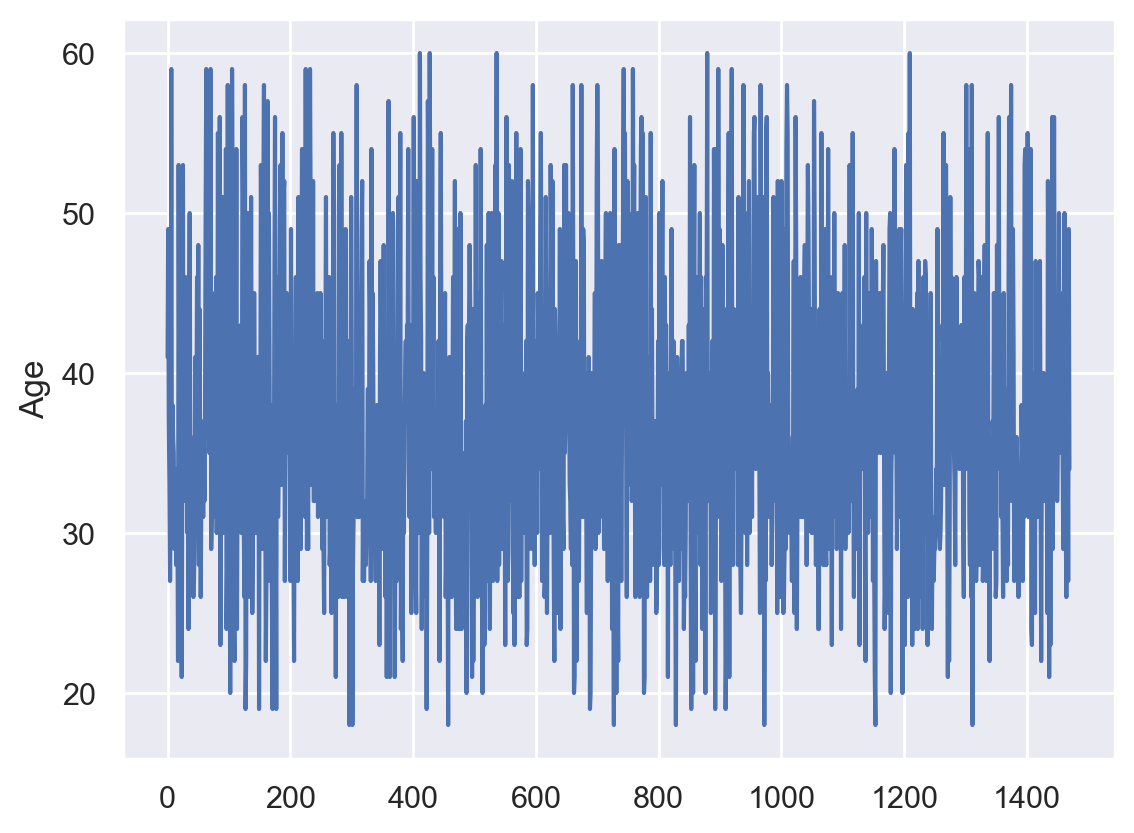

In [63]:
sns.lineplot(df['Age'])

<Axes: xlabel='DailyRate', ylabel='Count'>

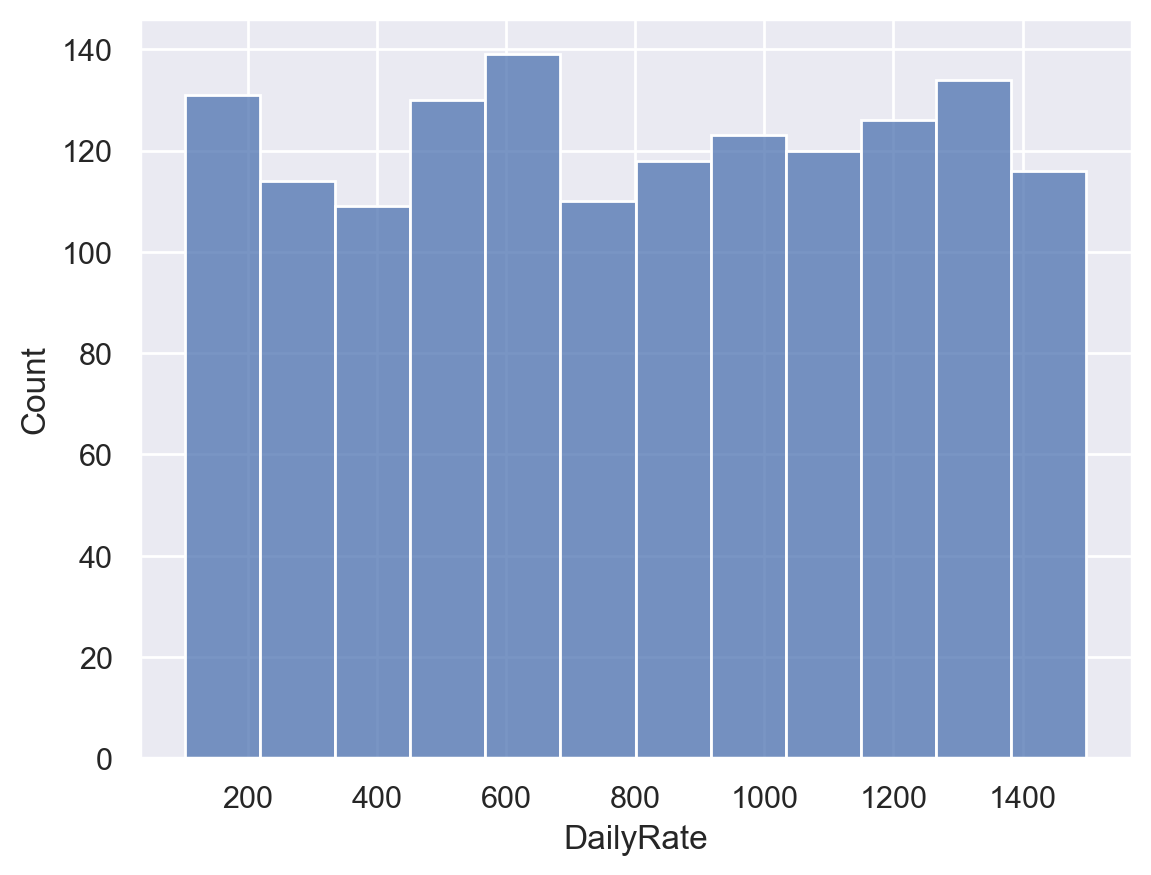

In [64]:
sns.histplot(df['DailyRate'])

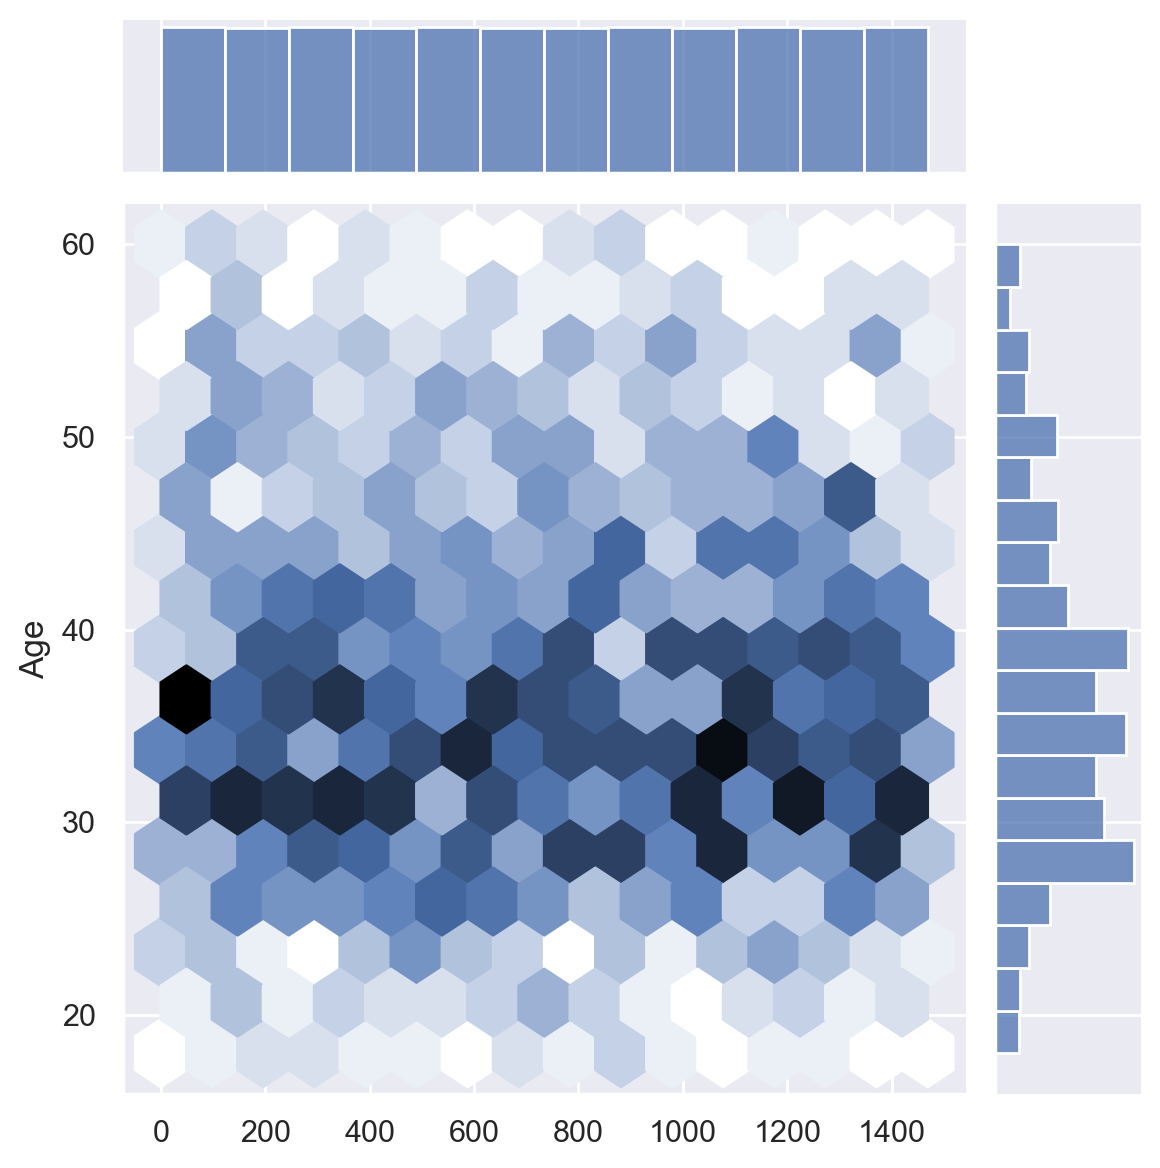

In [65]:
sns.jointplot(df['Age'],kind='hex')

<Axes: ylabel='Age'>

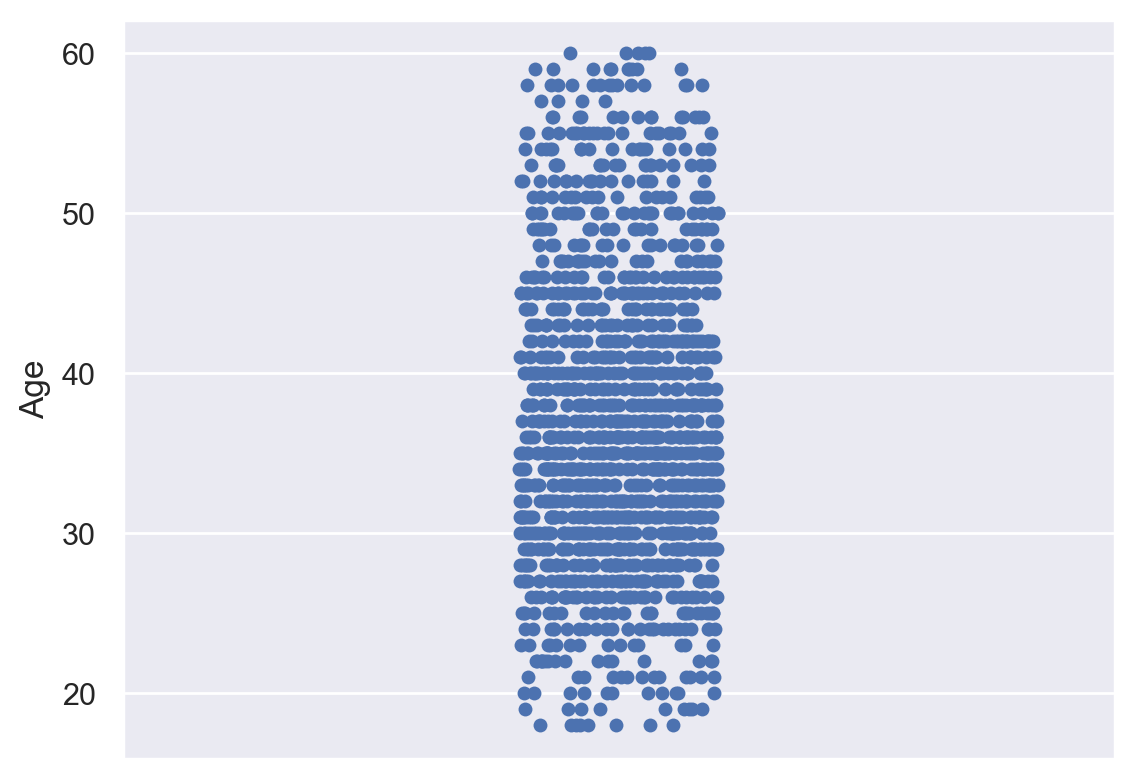

In [66]:
sns.stripplot(df['Age'])

<Axes: xlabel='Age', ylabel='Density'>

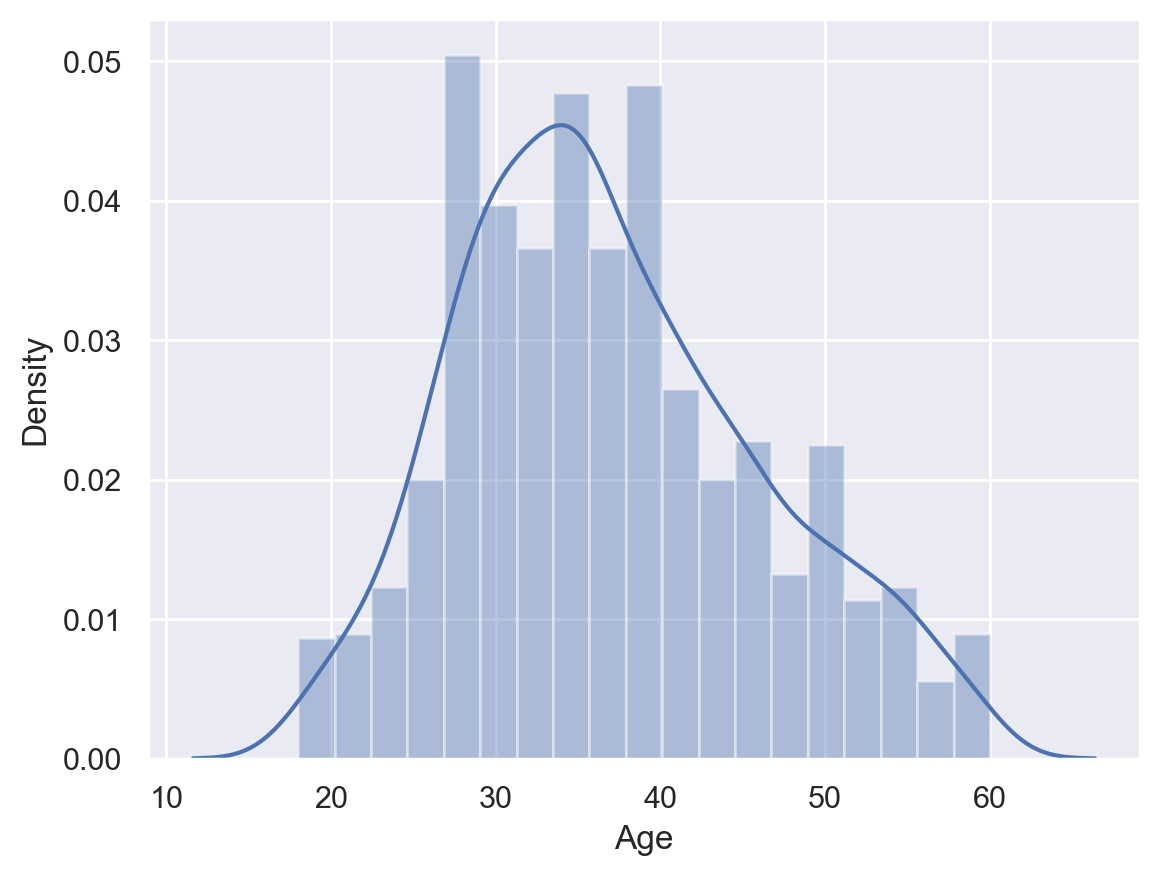

In [67]:
sns.distplot(df['Age'])

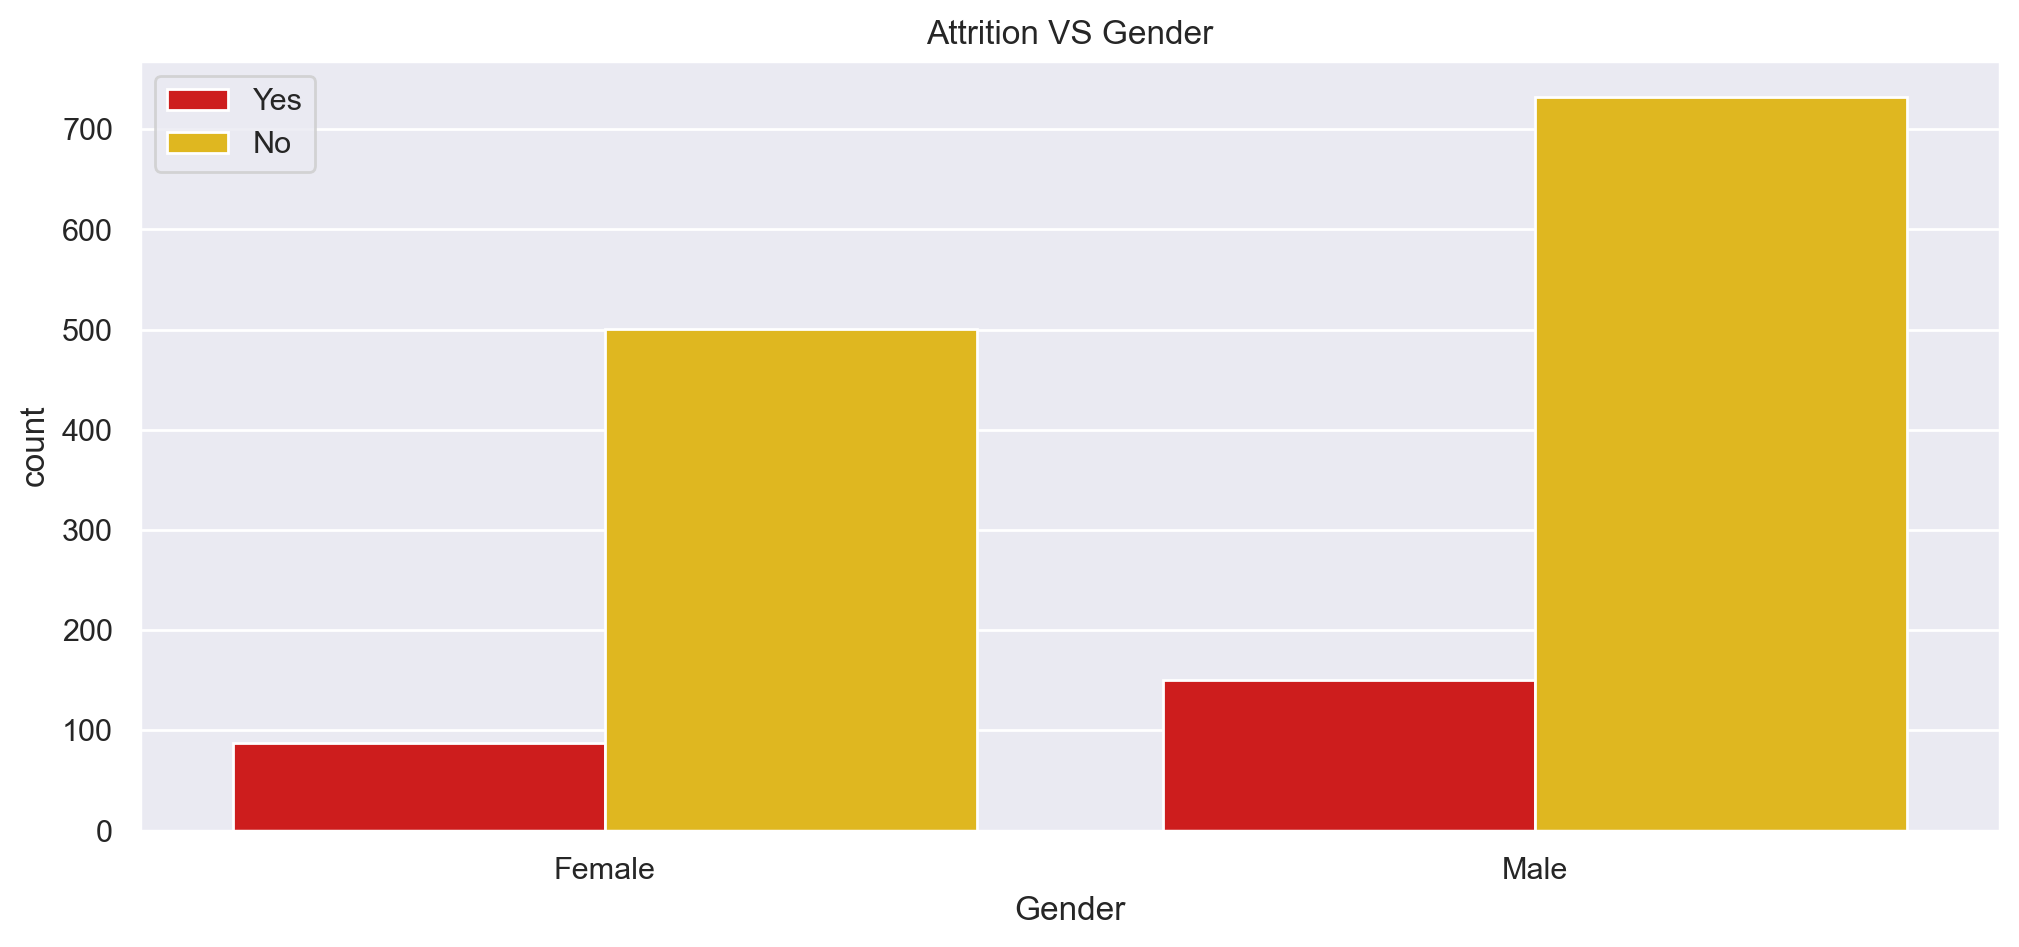

In [68]:
plt.figure(figsize=(12,5))
sns.countplot(x='Gender',hue='Attrition',data=df, palette='hot')
plt.title( 'Attrition VS Gender')
plt.legend(loc='best')
plt.show()


# distribution of some numerical columns in a df

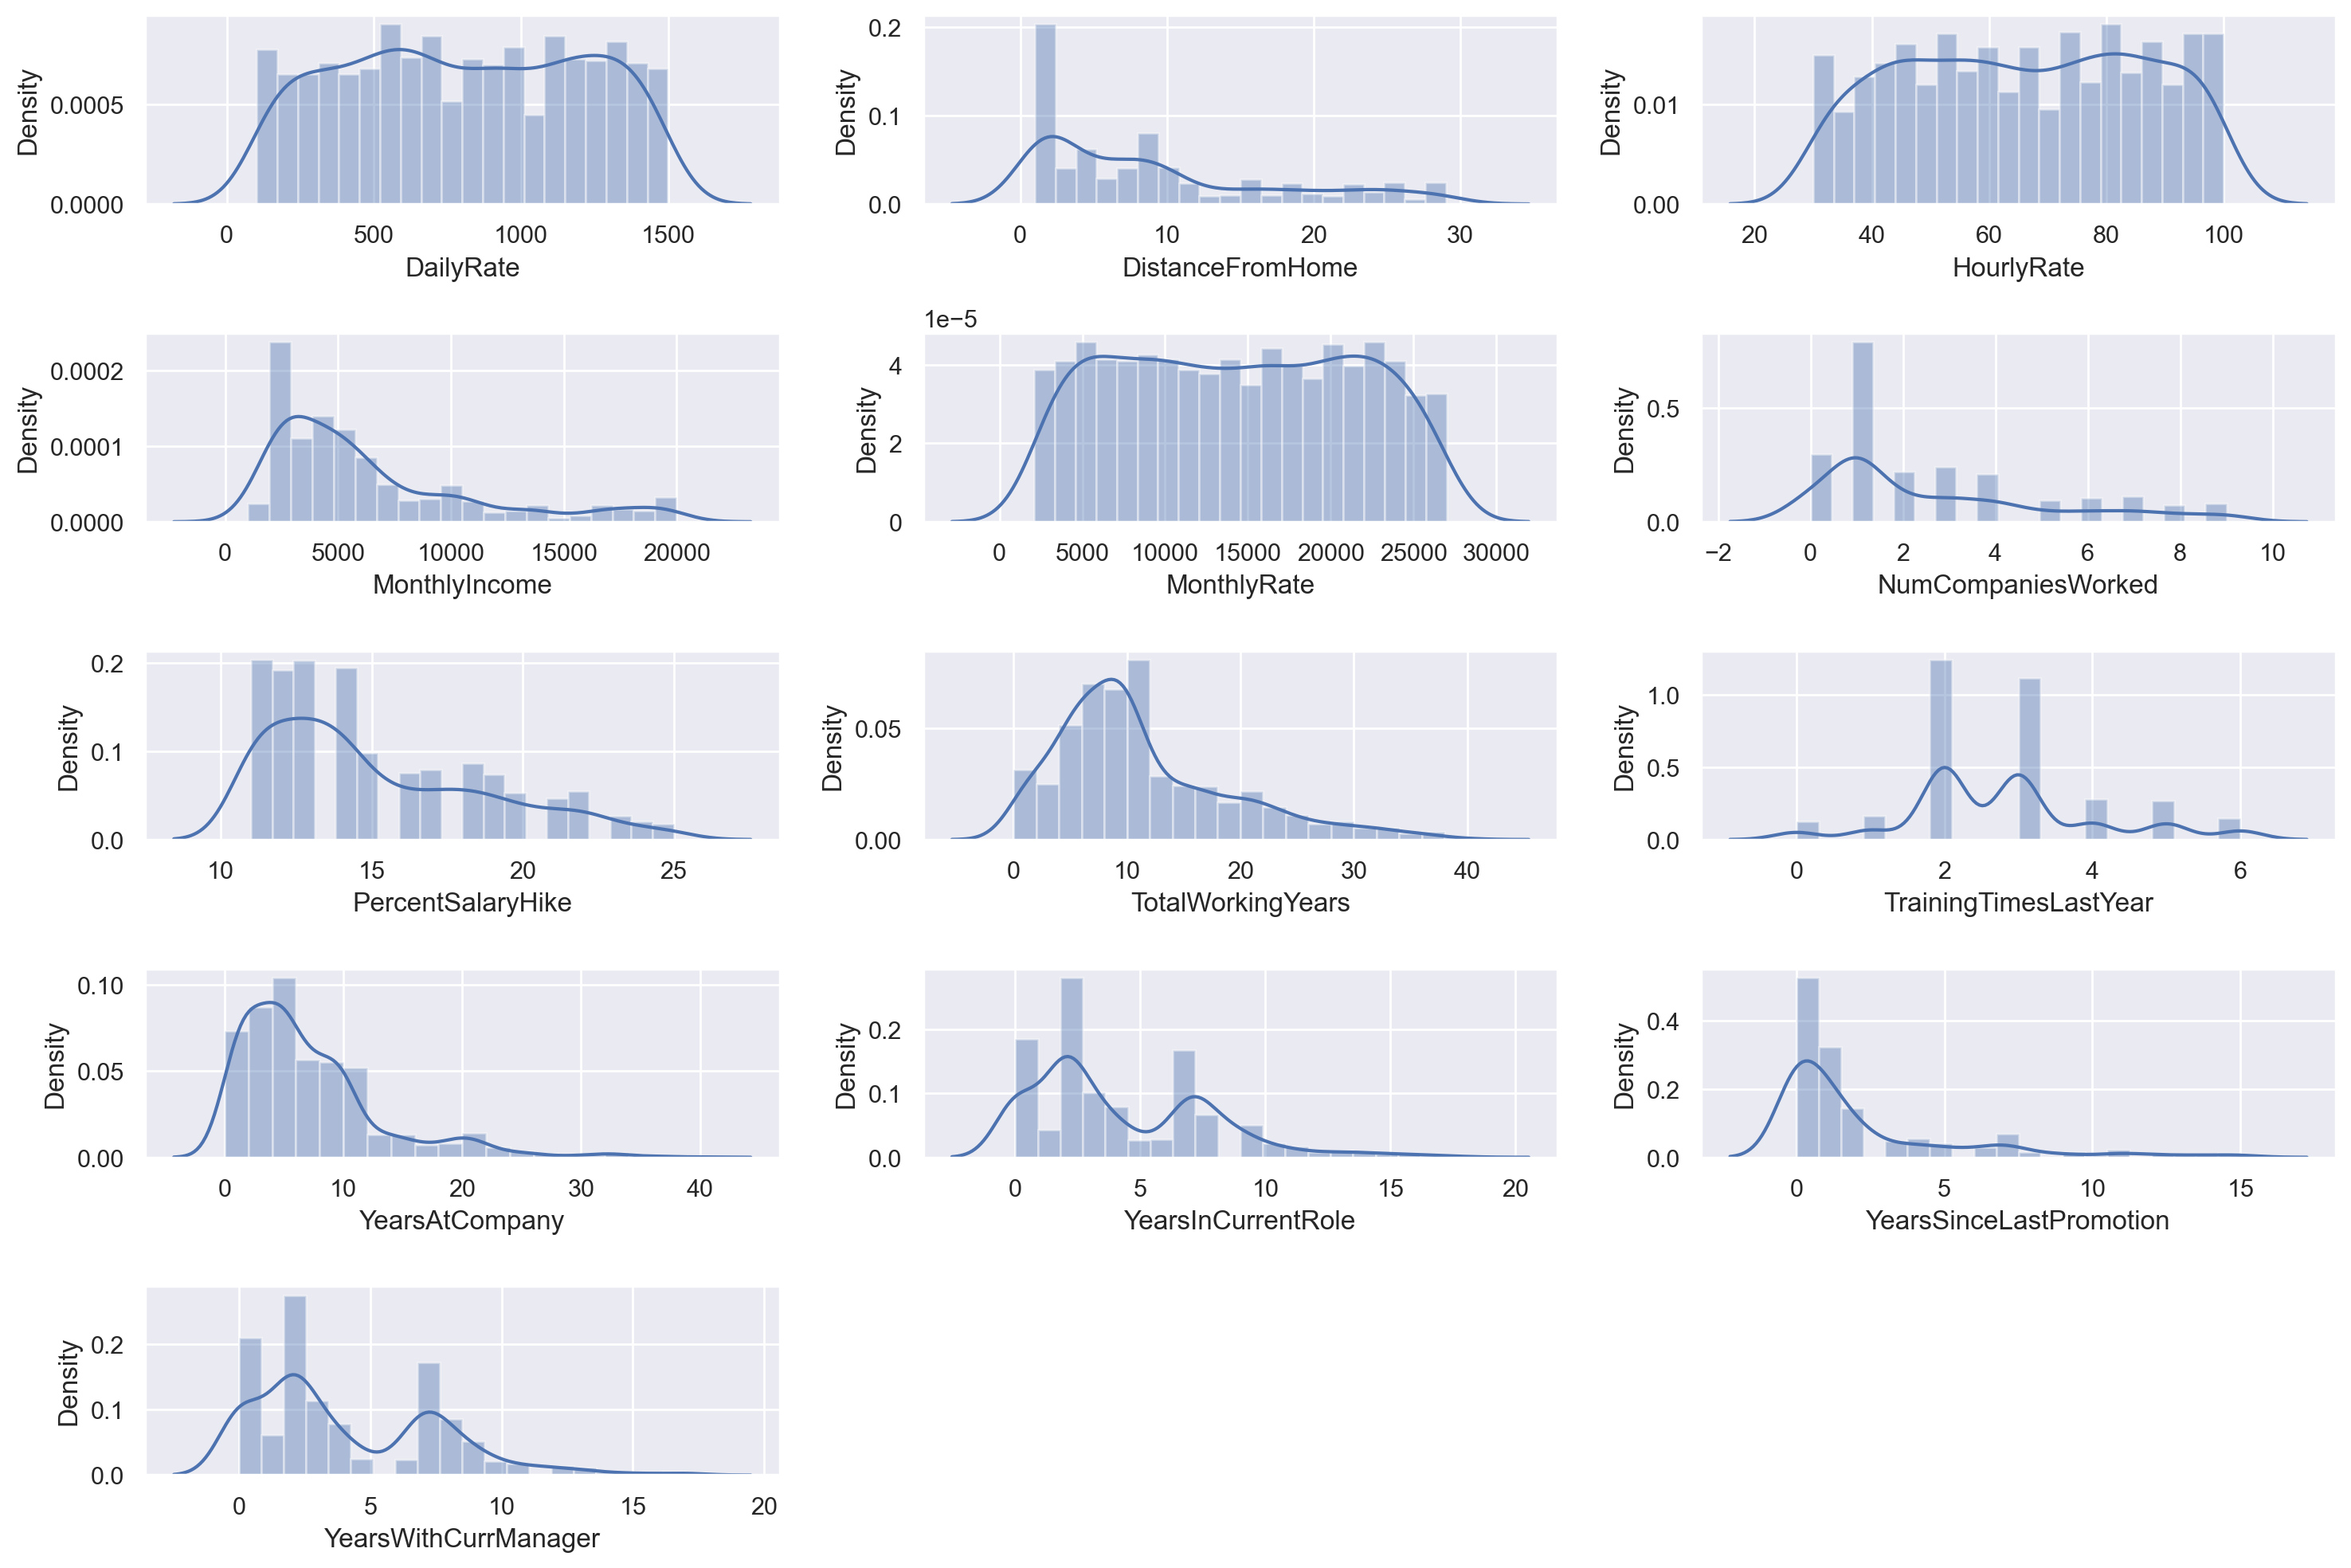

In [126]:
Numerical_list = ['DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                  'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_list, 1):
    plt.subplot(5, 3, i)
    sns.distplot(df[column], bins=20)
plt.tight_layout()
plt.show()

# distribution of some numerical data

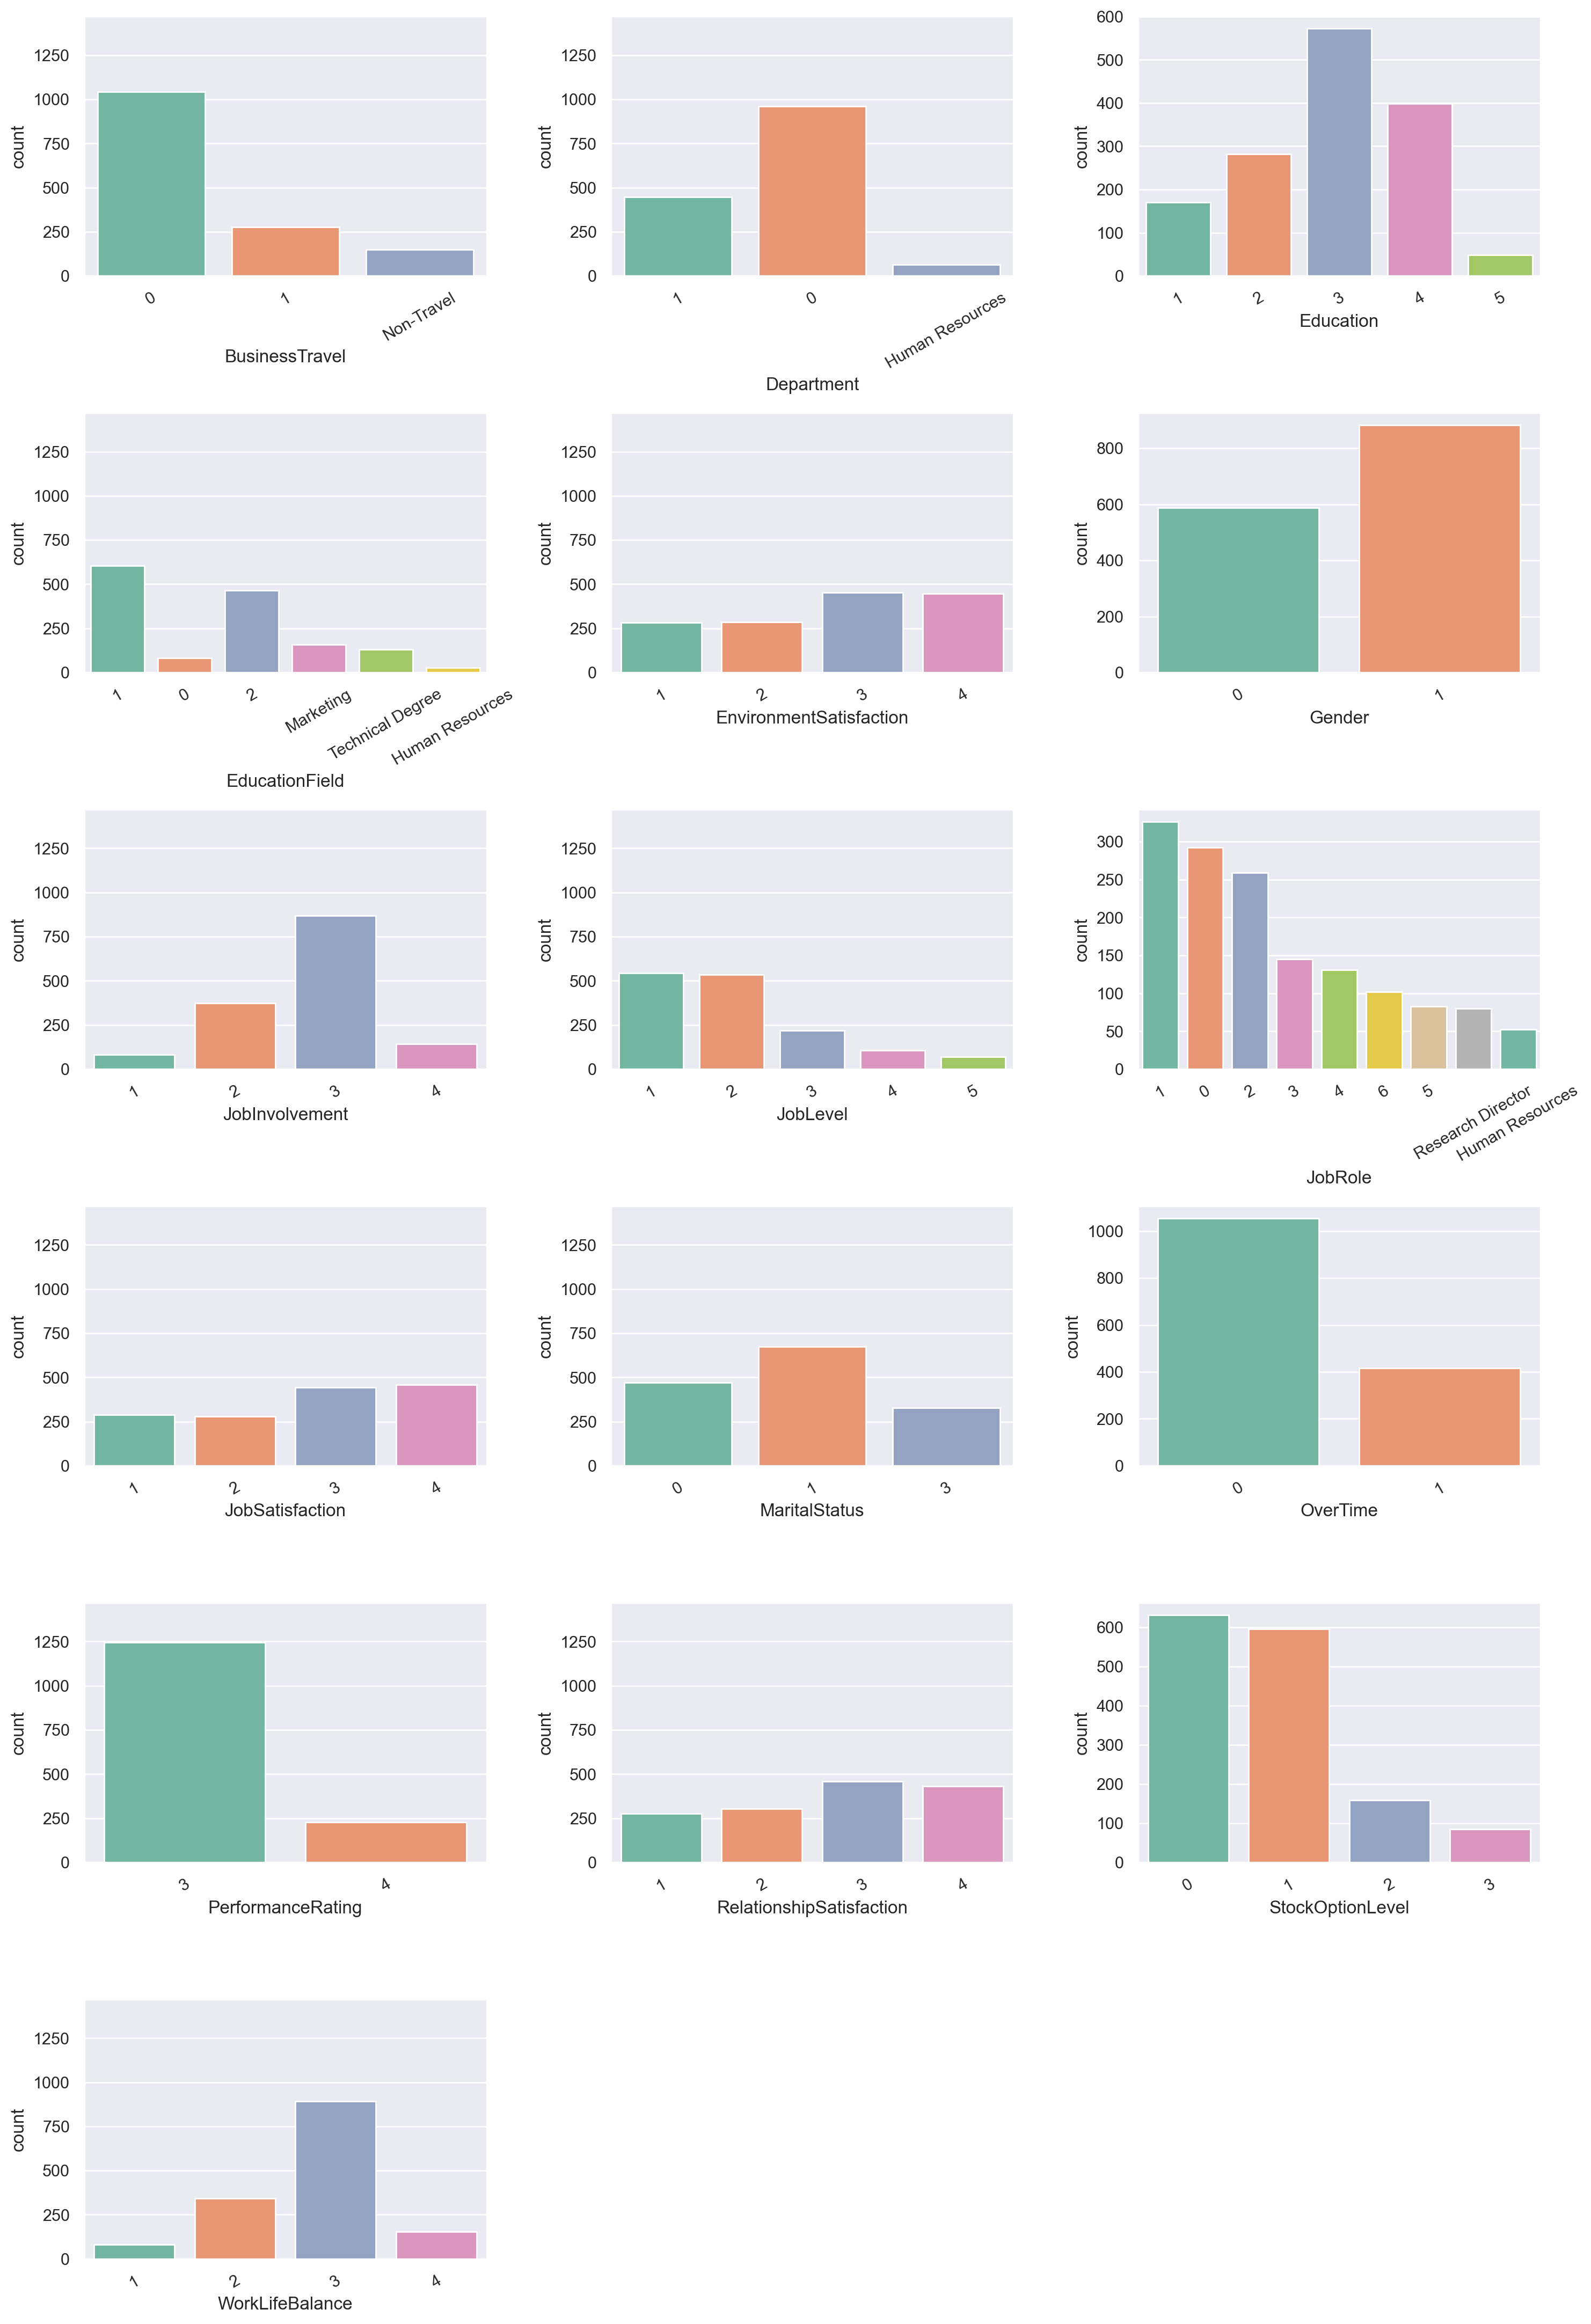

In [122]:
categorical_list = ['BusinessTravel', 'Department', 'Education', 'EducationField', 
             'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',
             'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
             'StockOptionLevel', 'WorkLifeBalance']

# Create subplots
plt.figure(figsize=(15, 25))
gridspec = plt.GridSpec(7, 3)
locator1, locator2 = [0, 0]

for column in cate_list:
    plt.subplot(gridspec[locator1, locator2])
    sns.countplot(data=df, x=column, palette='Set2')
    plt.xticks(rotation=30)
    
    locator2 += 1
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    if locator1 == 7:
        break

    # Set the y-axis limits to display more values
    plt.ylim(0, len(df))  # You can adjust the range as needed

plt.tight_layout()
plt.show()

In [ ]:
### most of employees are satisfied, of which the number of "3" and "4" indicate high satisfaction are a lot.

Most employees hold bachelor degree
many people major in life science.
job level 1 is the majority job level.



# ENCODING CATEGORICAL DATA

In [68]:
convert={'Attrition':{"Yes":1, "No":0}}
df2=df.replace(convert)
df2
convert={'Department':{"Sales":1, "Research & Development":0}}
df2=df.replace(convert)
df2
convert={'EducationField':{"Medical":2, "Life Sciences":1, "Other":0}}
df=df.replace(convert)
df2
convert={'BusinessTravel':{"Non_Travel":2, "Travel_Frequently":1, "Travel_Rarely":0}}
df=df.replace(convert)
df2
convert={'Gender':{"Male":1, "Female":0}}
df2=df.replace(convert)
df2
convert={'JobRole':{"Manager":6,"Sales Representative":5,"Healthcare Representative":4,"Manufacturing Director":3,"Laboratory Technician":2,"Sales Executive":1, "Research Scientist":0}}
df2=df.replace(convert)
df2
convert={'Over18':{"Y":1}}
df2=df.replace(convert)
df2
convert={'OverTime':{"Yes":1,"No":0}}
df2=df.replace(convert)
df2
convert={'MaritalStatus':{"Divorced":3,"Married":1, "Single":0}}
df2=df.replace(convert)
df2


,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,Yes,0,1102,1,2,1,1,2,Female,94,3,2,4,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,No,1,279,8,1,1,2,3,Male,61,2,2,2,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,Yes,0,1373,2,2,1,4,4,Male,92,2,1,3,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,No,1,1392,3,4,1,5,4,Female,56,3,1,3,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,No,0,591,2,1,1,7,1,Male,40,3,1,2,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,1,884,23,2,1,2061,3,Male,41,4,2,4,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,No,0,613,6,1,1,2062,4,Male,42,2,3,1,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,No,0,155,4,3,1,2064,2,Male,87,4,2,2,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,No,1,1023,2,3,1,2065,4,Male,63,2,2,2,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


# frquency tables

In [79]:
#create a frequency table from attribute attrition
freq_table = pd.crosstab(df['Attrition'], 'no_of_attirition')
freq_table

col_0,no_of_attirition
Attrition,
0,1233
1,237


In [80]:
freq_table = pd.crosstab(df['EducationField'], 'no_of_attirition')
freq_table

col_0,no_of_attirition
EducationField,
0,82
1,606
2,464
Human Resources,27
Marketing,159
Technical Degree,132


In [153]:
sorted_df=df.sort_values(by='Age',ascending=True)
sorted=sorted_df['Age']
sorted

1311    18
457     18
972     18
301     18
296     18
        ..
536     60
427     60
411     60
879     60
1209    60
Name: Age, Length: 1470, dtype: int64

In [154]:
freq_table = pd.crosstab(index=[df['Attrition'], df['Department']], columns=df['Education'])
freq_table

Education                          1    2    3    4   5
Attrition Department                                   
No        Human Resources          4   10   23   12   2
          Research & Development  96  159  323  223  27
          Sales                   39   69  127  105  14
Yes       Human Resources          1    3    4    3   1
          Research & Development  19   23   56   32   3
          Sales                   11   18   39   23   1

# FEATURE SELECTION

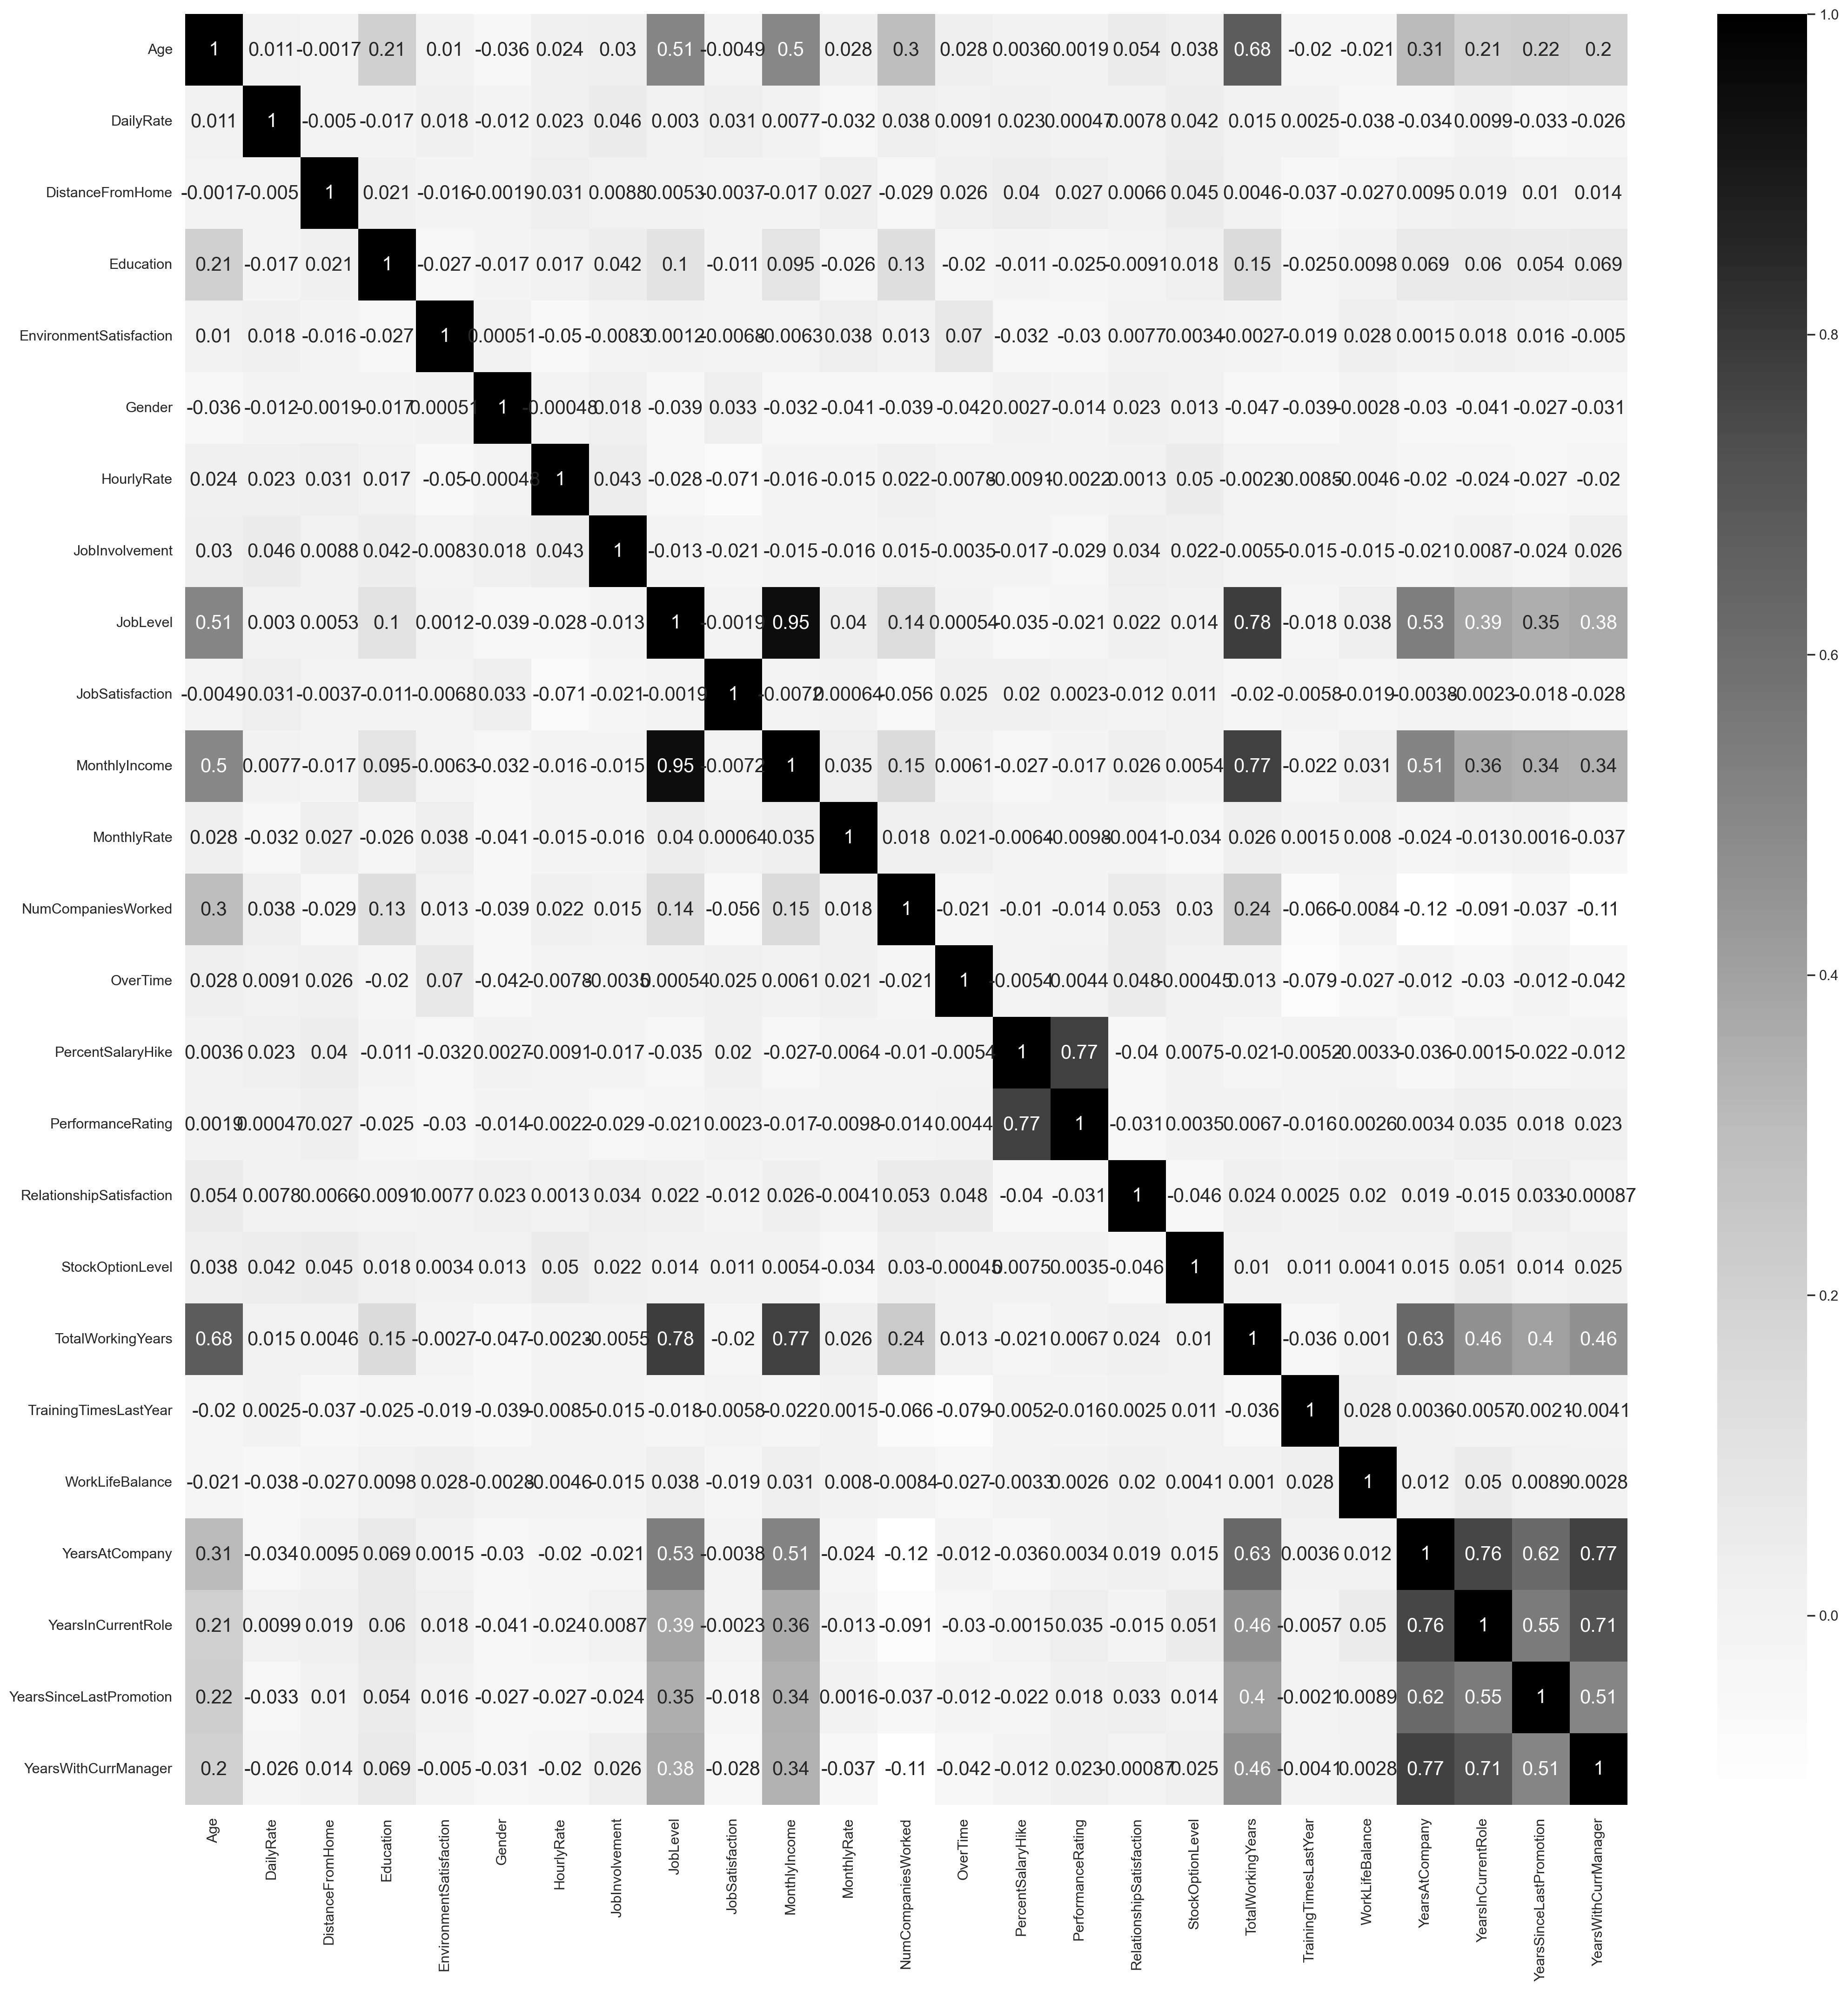

In [40]:
#CORRELATION
# Calculate the correlation matrix between features
# Filter the DataFrame to include only numeric columns
numeric_columns = df.select_dtypes(include=[int, float])

# Create a correlation heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="Greys", annot_kws={"size": 15})
plt.show()

### YearsAtCompany, yearsInCurrentRole, YearswithCurentManager and Yearssincelast promotion are correlated
TotalWorkingYears,MonthlyIncome and JobLevel are correlated 


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [93]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X = df2.drop('Attrition', axis=1)
y = df2['Attrition']

In [95]:
df2 = pd.DataFrame({'Attrition': [0, 1]})
df3 =df2.rename(columns={'Attrition_Yes': 'Attrition'})

In [97]:
# Separate features and target variable
X = df3.drop('Attrition', axis=1)
y = df3['Attrition']

In [98]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# cross analysis of categorical and numerical data
cross validation 
purpose

In [174]:
# Iterate through categorical features
for categorical_feature in df.select_dtypes(include='object').columns:
    le = preprocessing.LabelEncoder()
    df[cate_feature] = le.fit_transform(df[cate_feature])

# Now, you can display the encoded DataFrame
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


In [99]:
dummies = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
df = pd.get_dummies(data=df, columns=dummies)
display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,Yes,Travel_Rarely,1102,1,2,1,1,2,Female,94,3,2,4,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,No,Travel_Frequently,279,8,1,1,2,3,Male,61,2,2,2,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,Yes,Travel_Rarely,1373,2,2,1,4,4,Male,92,2,1,3,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,3,4,1,5,4,Female,56,3,1,3,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,No,Travel_Rarely,591,2,1,1,7,1,Male,40,3,1,2,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [59]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score


In [60]:
from sklearn.model_selection import train_test_split
x=df.drop('Attrition', axis=1)
y=df['Attrition']

x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.8, test_size=0.2, random_state=42)

print("shape of x_train:", x_train.shape)
print("shape of x_test:", x_test.shape)
print("shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)

shape of x_train: (1176, 51)
shape of x_test: (294, 51)
shape of y_train: (1176,)
shape of y_test: (294,)


In [110]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier  # Replace with your model
from sklearn.datasets import load_iris  # Replace with your dataset

# Load your dataset (replace with your own dataset)
X, y = load_iris(return_X_y=True)

# Create a model (replace with your own model)
model = RandomForestClassifier()

# Specify the number of folds (2 in this case)
num_folds = 2

# Create a K-Fold cross-validator with 2 folds
kf = KFold(n_splits=num_folds)

# Perform 2-fold cross-validation and calculate accuracy scores
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold and their mean
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.2f}")

mean_accuracy = scores.mean()
print(f"Mean Accuracy = {mean_accuracy:.2f}")



Fold 1: Accuracy = 0.31
Fold 2: Accuracy = 0.33
Mean Accuracy = 0.32


In [ ]:
interpretatation of mean accuracy = 0.32
